# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

In [73]:
# Import numpy and pandas 

In [2]:
import numpy as np
import pandas as pd

In [3]:
# more imports

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# read in the csv to a data frame

In [6]:
df = pd.read_csv('911.csv')

In [7]:
# check info of the data frame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [9]:
# print head of data frame

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

In [11]:
# print the top 5 zip codes for 911 calls as a data frame

In [12]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [13]:
# print the top 5 twps for 911 calls as a data frame

In [14]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [15]:
# printing number of unique town names there are

In [16]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [17]:
extract = lambda x: x.split(':')[0]
df = df.assign(Reason = df['title'].apply(extract))

In [18]:
# return most common reasons for a 911 call, based on previous assignment

In [19]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [20]:
# create a counterplot of calls by reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

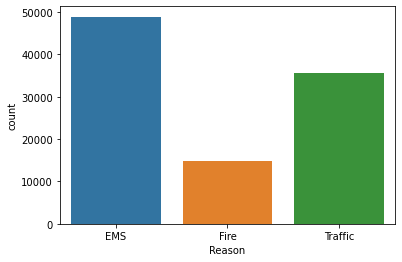

In [22]:
sns.countplot(x = 'Reason', data = df)

In [23]:
# Create boxplot, joint and some pairplot

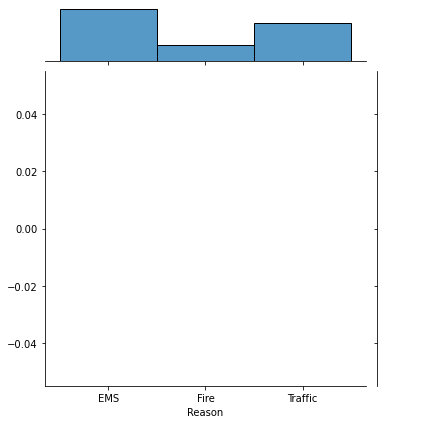

In [24]:
sns.jointplot(x = 'Reason', data = df)

<AxesSubplot:xlabel='zip'>

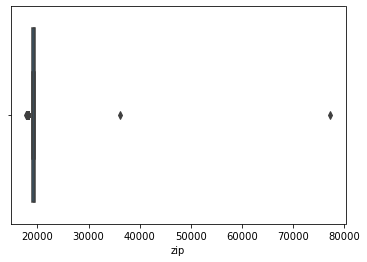

In [25]:
sns.boxplot(x = 'zip', data = df)

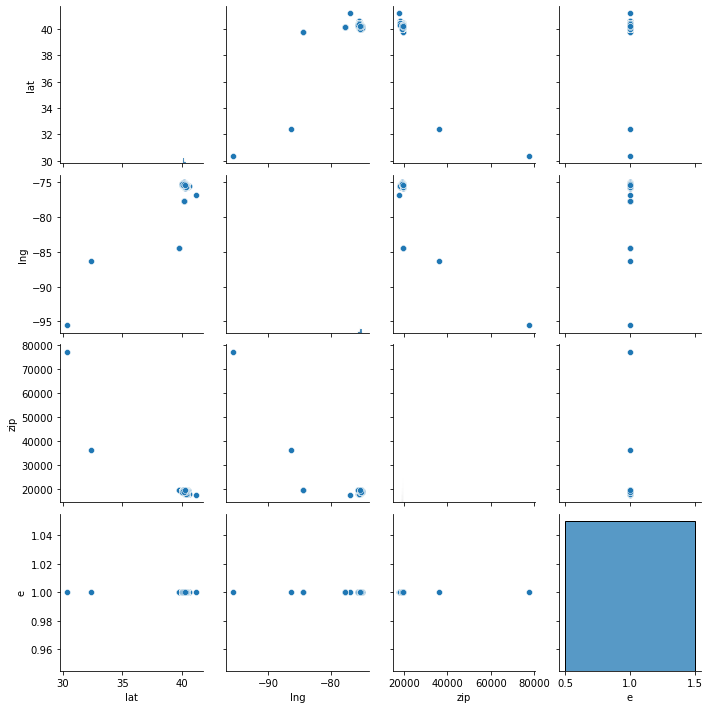

In [26]:
sns.pairplot(df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [27]:
type('timeStamp')

str

In [28]:
# convert columns from strings to objects

In [29]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y/%m/%d %H:%M:%S')

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [30]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.day_of_week)

In [31]:
# map days of the weeks to keys

In [32]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].apply(lambda x: dmap[x])

In [33]:
# creating a countplot of day sof the week and hue is based off reason for call

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

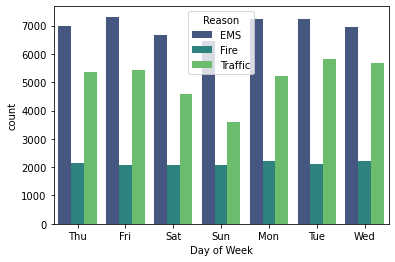

In [34]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason', palette = 'viridis')

In [35]:
# do the same for month

<AxesSubplot:xlabel='Month', ylabel='count'>

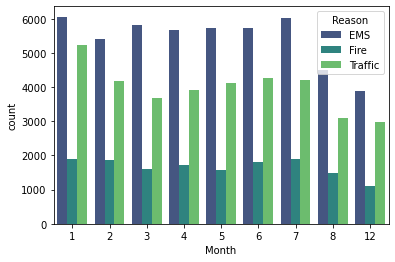

In [36]:
sns.countplot(x = 'Month', data = df, hue = 'Reason', palette = 'viridis')

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

In [37]:
# group data by month and print head

In [38]:
byMonth = df.groupby('Month').count()

In [39]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [40]:
# indicate the number of 911 calls by month

<AxesSubplot:xlabel='Month'>

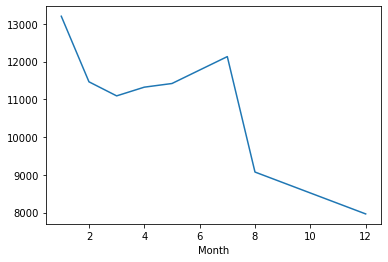

In [43]:
byMonth['twp'].plot()

In [44]:
# create lmplot of the data taking the month vs. twp using seaborn

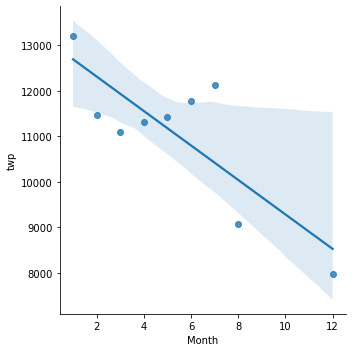

In [45]:
byMonth = byMonth.reset_index()
sns.lmplot(x = 'Month', y = 'twp', data = byMonth, palette = 'viridis')

In [46]:
# add a new column to the data frame that contains date from timeStamp column

In [47]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [48]:
# group Date col by count and create plot of 911 calls

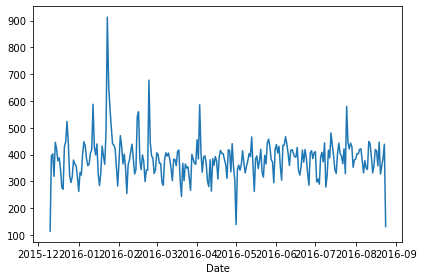

In [49]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [50]:
# create 3 separate plots with a reason for a call for each plot

In [51]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [52]:
df['Reason'].tail()

99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, dtype: object

Text(0.5, 1.0, 'EMS')

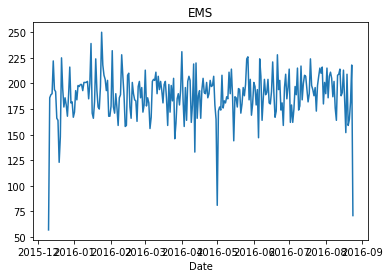

In [53]:
df_traffic = df[df['Reason'] == 'EMS']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

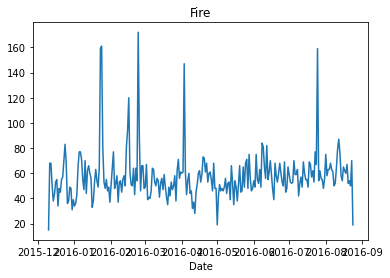

In [54]:
df_traffic=df[df['Reason']=='Fire']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

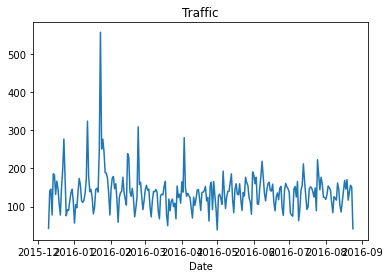

In [55]:
df_traffic = df[df['Reason'] == 'Traffic']
df_traffic.groupby('Date').count()['twp'].plot()
plt.title('Traffic')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [56]:
# restructure data frame so Hours are the cols and Index is Day of week

In [57]:
df2 = df.groupby(['Hour','Day of Week']).count().unstack()['Reason']
df2.head()

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Hour,,,,,,,
0,275,282,375,383,278,269,250
1,235,221,301,306,202,240,216
2,191,201,263,286,233,186,189
3,175,194,260,268,159,170,209
4,201,204,224,242,182,209,156


In [58]:
# create a heatmap and a cluster map with this data

<AxesSubplot:xlabel='Day of Week', ylabel='Hour'>

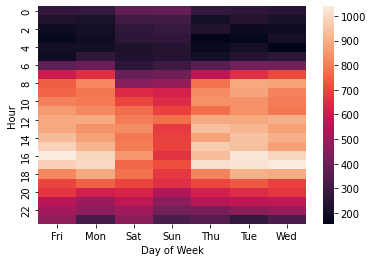

In [60]:
sns.heatmap(df2)

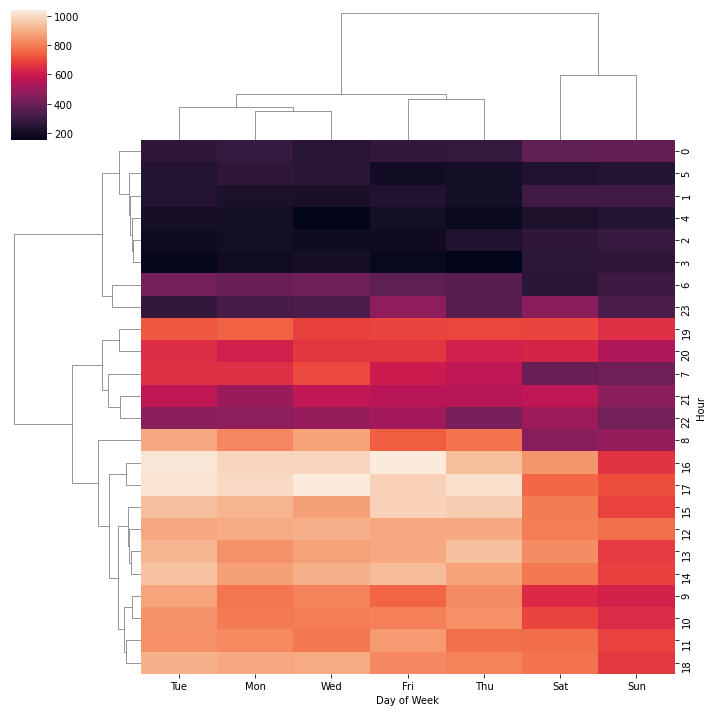

In [61]:
sns.clustermap(df2)

In [62]:
# repeat these plots with month as the col

In [63]:
df3 = df.groupby(['Month', 'Day of Week']).count().unstack()['Reason']
df3.head()

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
1,1970,1727,2291,1960,1584,1973,1700
2,1581,1964,1441,1229,1596,1753,1903
3,1525,1535,1266,1102,1900,1884,1889
4,1958,1598,1734,1488,1601,1430,1517
5,1730,1779,1444,1424,1590,1918,1538


<AxesSubplot:xlabel='Day of Week', ylabel='Month'>

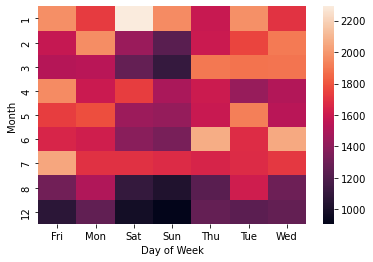

In [64]:
sns.heatmap(df3)

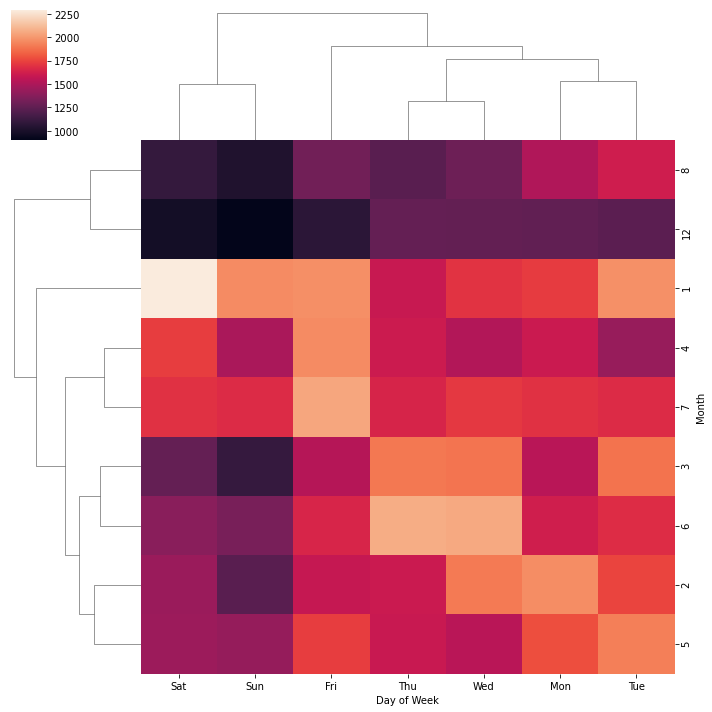

In [65]:
sns.clustermap(df3)

In [134]:
!pwd

/Users/julianfrancis/Desktop/Intro_Data_Sci


**Continue exploring the Data however you see fit!**
# Great Job!